In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.style.use('ggplot') 



In [2]:
train = pd.read_csv("/Users/user/Downloads/competitive-data-science-predict-future-sales/sales_train.csv")
test = pd.read_csv("/Users/user/Downloads/competitive-data-science-predict-future-sales/test.csv")
shops = pd.read_csv("/Users/user/Downloads/competitive-data-science-predict-future-sales/shops.csv")
items = pd.read_csv("/Users/user/Downloads/competitive-data-science-predict-future-sales/items.csv")
cats = pd.read_csv("/Users/user/Downloads/competitive-data-science-predict-future-sales/item_categories.csv")


------------- train info ------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None 

------------- test info ------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
None 

------------- items info ------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            N

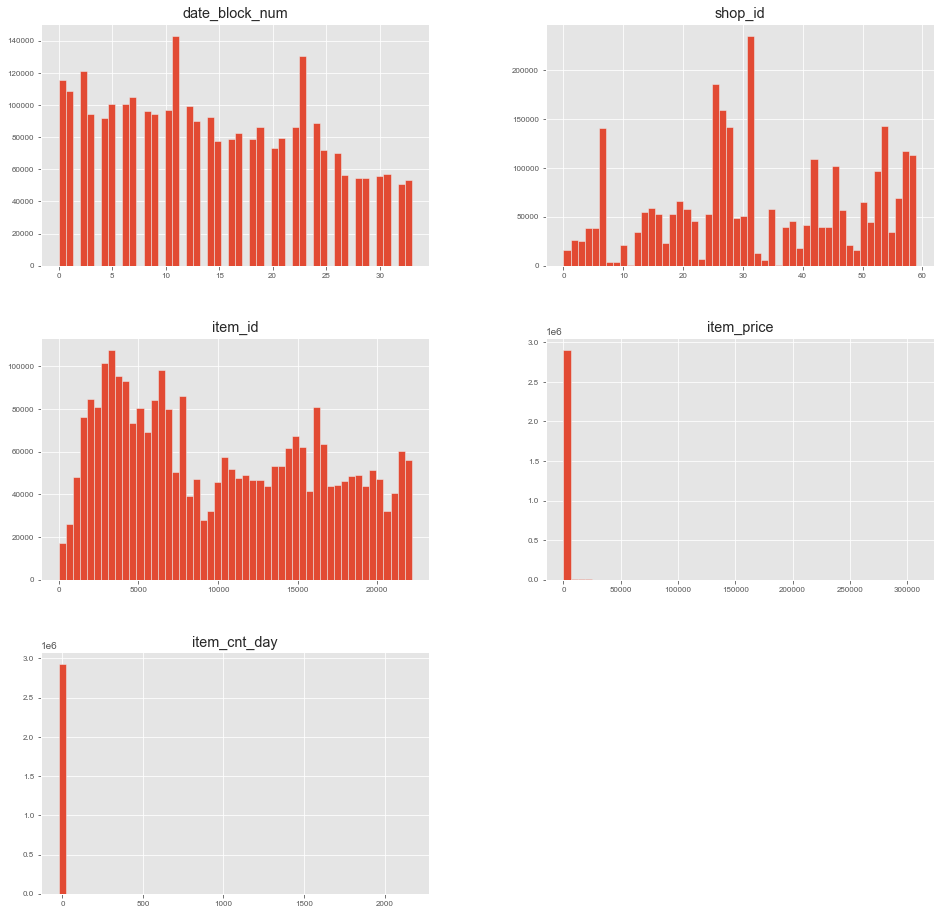

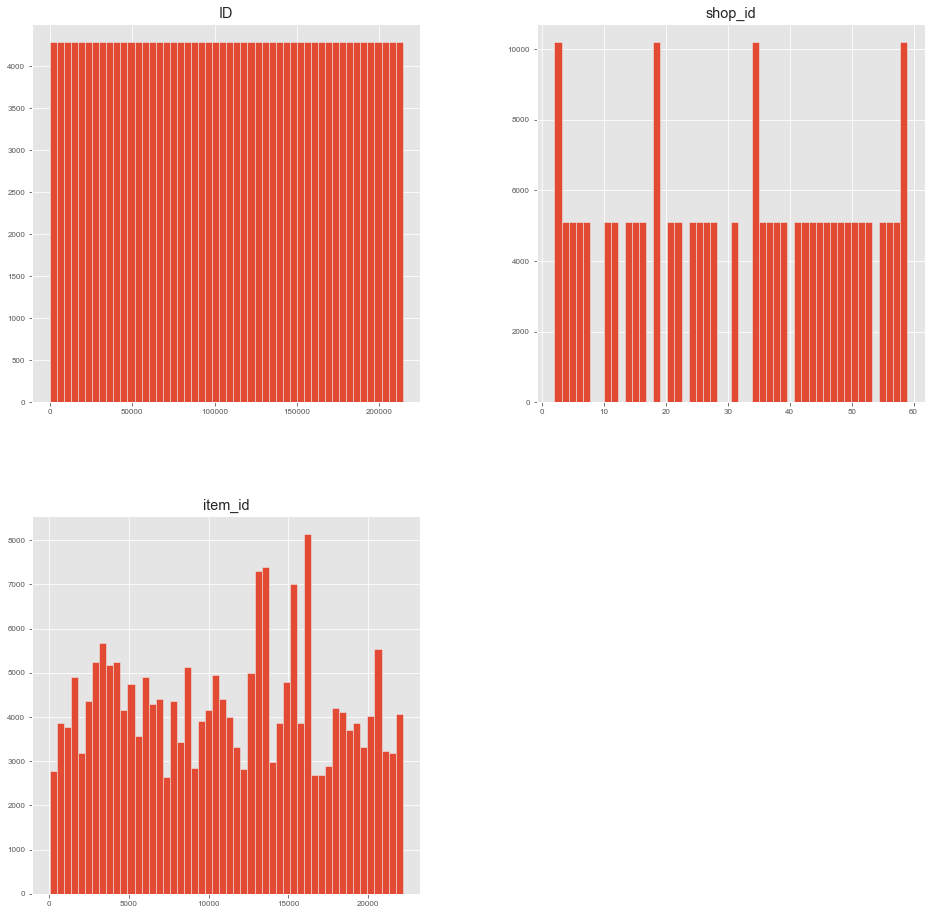

In [3]:
print('------------- train info ------------') ; print(train.info(), '\n')
print('------------- test info ------------') ; print(test.info(), '\n')
print('------------- items info ------------') ; print(items.info(), '\n')
print('------------- shops info ------------') ; print(shops.info(), '\n')
print('------------- categories info ------------') ; print(cats.info(), '\n')


def graph_insight(data):
    print(set(data.dtypes.tolist()))
    df_num = data.select_dtypes(include = ['float64', 'int64'])
    df_num.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8);
    
def all_graph_insights():
    datasets = [train,test]
    for i in datasets:
        graph_insight(i)

all_graph_insights()

In [4]:
l = list(cats.item_category_name)
l_cat = l

for ind in range(1,8):
    l_cat[ind] = 'Accessoires'

for ind in range(10,18):
    l_cat[ind] = 'Consoles'

for ind in range(18,37):
    l_cat[ind] = 'Games'

for ind in range(37,43):
    l_cat[ind] = 'Movie'

for ind in range(43,55):
    l_cat[ind] = 'Books'

for ind in range(55,61):
    l_cat[ind] = 'Music'

for ind in range(61,73):
    l_cat[ind] = 'Gifts'

for ind in range(73,79):
    l_cat[ind] = 'Soft'


cats['cats'] = l_cat
cats.head()

,item_category_name,item_category_id,cats
0,PC - Гарнитуры/Наушники,0,PC - Гарнитуры/Наушники
1,Аксессуары - PS2,1,Accessoires
2,Аксессуары - PS3,2,Accessoires
3,Аксессуары - PS4,3,Accessoires
4,Аксессуары - PSP,4,Accessoires


In [5]:
train['date'] =pd.to_datetime(train.date)
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [6]:
train['revenue'] = train['item_price']*train['item_cnt_day']

train_df = train.drop(['item_price'],axis=1).merge(items.drop(['item_name'],axis = 1), how="inner", on="item_id")
train_df.head()

,date,date_block_num,shop_id,item_id,item_cnt_day,revenue,item_category_id
0,2013-02-01,0,59,22154,1.0,999.0,37
1,2013-01-23,0,24,22154,1.0,999.0,37
2,2013-01-20,0,27,22154,1.0,999.0,37
3,2013-02-01,0,25,22154,1.0,999.0,37
4,2013-03-01,0,25,22154,1.0,999.0,37


In [7]:
#p_df = train_cleaned_df.groupby(by=['shop_id','item_id','date_block_num']).sum()


## Pivot by monht to wide format
train_cleaned_df = train_df.pivot_table(index=['shop_id','item_id'], columns='date_block_num', values='item_cnt_day',aggfunc='sum').fillna(0.0)

apply_df = test.merge(train_cleaned_df, how = "left", on = ["shop_id", "item_id"]).fillna(0.0)
apply_df.head()

,ID,shop_id,item_id,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# X we will keep all columns execpt the last one 
X_train = np.expand_dims(apply_df.values[:,:-1],axis = 2)
# the last column is our prediction
y_train = apply_df.values[:,-1:]

# for test we keep all the columns execpt the first one
X_test = np.expand_dims(apply_df.values[:,1:],axis = 2)

# lets have a look on the shape 
print(X_train.shape,y_train.shape,X_test.shape)

(214200, 36, 1) (214200, 1) (214200, 36, 1)


In [12]:
#Tensorflow. LTSM

from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from keras.models import load_model, Model

# our defining sales model 
sales_model = Sequential()
sales_model.add(LSTM(units = 64,input_shape = (33,1)))
#sales_model.add(LSTM(units = 64,activation='relu'))
sales_model.add(Dropout(0.5))
sales_model.add(Dense(1))

sales_model.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])
sales_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [13]:
sales_model.fit(X_train,y_train,batch_size = 4096,epochs = 10)

Epoch 1/10
53/53 [==============================] - 46s 872ms/step - loss: 30.5482 - mean_squared_error: 30.5482
Epoch 2/10
53/53 [==============================] - 45s 852ms/step - loss: 30.2838 - mean_squared_error: 30.2838
Epoch 3/10
53/53 [==============================] - 52s 977ms/step - loss: 29.9958 - mean_squared_error: 29.9958
Epoch 4/10
53/53 [==============================] - 40s 750ms/step - loss: 29.8729 - mean_squared_error: 29.8729
Epoch 5/10
53/53 [==============================] - 39s 743ms/step - loss: 29.6583 - mean_squared_error: 29.6583
Epoch 6/10
53/53 [==============================] - 39s 731ms/step - loss: 29.6452 - mean_squared_error: 29.6452
Epoch 7/10
53/53 [==============================] - 38s 721ms/step - loss: 29.5561 - mean_squared_error: 29.5561
Epoch 8/10
53/53 [==============================] - 38s 717ms/step - loss: 29.6186 - mean_squared_error: 29.6186
Epoch 9/10
53/53 [==============================] - 38s 713ms/step - loss: 29.5301 - mean_square

In [14]:
submission_output = sales_model.predict(X_test)
# creating dataframe with required columns 
submission = pd.DataFrame({'ID':test['ID'],'item_cnt_month':submission_output.ravel()})
# creating csv file from dataframe
#submission.to_csv('submission.csv',index = False)
submission.to_csv('submission_stacked.csv',index = False)
submission.head()

,ID,item_cnt_month
0,0,0.466403
1,1,0.162971
2,2,0.826900
3,3,0.207217
4,4,0.162971


import xgboost as xgb
param = {'max_depth':10, 
         'subsample':1,
         'min_child_weight':0.5,
         'eta':0.3, 
         'num_round':1000, 
         'seed':1,
         'silent':0,
         'eval_metric':'rmse'}

progress = dict()
xgbtrain = xgb.DMatrix(train_cleaned_df.iloc[:,  (train_cleaned_df.columns != 33)].values, train_cleaned_df.iloc[:, train_cleaned_df.columns == 33].values)
watchlist  = [(xgbtrain,'train-rmse')]

bst = xgb.train(param, xgbtrain)
preds = bst.predict(xgb.DMatrix(train_cleaned_df.iloc[:,  (train_cleaned_df.columns != 33)].values))
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(preds,train_cleaned_df.iloc[:, train_cleaned_df.columns == 33].values))
print(rmse)

apply_df = test
apply_df['shop_id']= apply_df.shop_id.astype('str')
apply_df['item_id']= apply_df.item_id.astype('str')


apply_df = test.merge(train_cleaned_df, how = "left", on = ["shop_id", "item_id"]).fillna(0.0)
apply_df.head()
# Move to one month front
d = dict(zip(apply_df.columns[4:],list(np.array(list(apply_df.columns[4:])) - 1)))

apply_df  = apply_df.rename(d, axis = 1)
preds = bst.predict(xgb.DMatrix(apply_df.iloc[:, (apply_df.columns != 'ID') & (apply_df.columns != -1)].values))
# Normalize prediction to [0-20]
preds = list(map(lambda x: min(20,max(x,0)), list(preds)))
sub_df = pd.DataFrame({'ID':apply_df.ID,'item_cnt_month': preds })
sub_df.describe()
sub_df.to_csv('Submission_Predict Sales.csv',index=False)